In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
% matplotlib inline

In [6]:
os.chdir(r'C:\Users\C336682\Documents\fake\IC_FakeNews-master\data\new\\')

In [27]:
elpais = pd.read_csv(r'ElPais03.csv')
boatos = pd.read_excel(r'boatos.xlsx', header=None)
newsatual = pd.read_excel(r'newsatual.xlsx')

In [30]:
elpais = elpais.drop(columns=['Unnamed: 0'])

In [31]:
elpais['Class'] = 1

In [49]:
elpais.columns = ['title','URL','Class']

In [50]:
elpais.head()

,title,URL,Class
0,Indústria brasileira reage com melhora do comé...,https://brasil.elpais.com/brasil/2013/12/03/ec...,1
1,A bancarrota de Detroit deixa no ar as pensões...,https://brasil.elpais.com/brasil/2013/12/03/ec...,1
2,"PIB no Brasil cai 0,5% na leitura trimestral, ...",https://brasil.elpais.com/brasil/2013/12/03/ec...,1
3,O órgão supervisor europeu questiona o trabalh...,https://brasil.elpais.com/brasil/2013/12/02/ec...,1
4,"Vega Sicilia, a ilusão da escassez",https://brasil.elpais.com/brasil/2013/11/29/ec...,1


In [368]:
for j in range(9):
    print(elpais.iloc[j,0])

Indústria brasileira reage com melhora do comércio internacional 
A bancarrota de Detroit deixa no ar as pensões públicas 
PIB no Brasil cai 0,5% na leitura trimestral, mas sobe 2,4% no acumulado do ano 
O órgão supervisor europeu questiona o trabalho das agências de ‘rating’ 
Vega Sicilia, a ilusão da escassez 
Reajuste dos combustíveis traz alívio à Petrobras 
Petrobras salva o primeiro leilão de gás terrestre no Brasil 
Bolha imobiliária à brasileira mistura preço alto e crédito limitado 
O Banco Central do Brasil sobe a taxa de juros para dois dígitos 


In [33]:
boatos.columns = ['title','type','URL']

In [35]:
boatos = boatos.drop(columns=['type'])

In [38]:
boatos['Class'] = 0

In [371]:
boatos['title']=boatos['title'].apply(lambda x:x.replace("#boato",""))

In [372]:
boatos.head()

,title,URL,Class
0,Peixe com braço humano foi encontrado em Arapi...,www.boatos.org/brasil/peixe-braco-humano-arapi...,0
1,Globo News se arrependeu de convidar general H...,www.boatos.org/brasil/globo-news-arrependeu-ge...,0
2,Pabllo Vittar cai tombo durante show e “paga m...,www.boatos.org/entretenimento/pabllo-vittar-to...,0
3,Crivella diz que Rio foi castigado com dilúvio...,www.boatos.org/politica/crivella-rio-castigado...,0
4,Museu do Holocausto tem placa com sinais do fa...,www.boatos.org/mundo/museu-holocausto-placa-fa...,0


In [373]:
boatos.iloc[0,0]

'Peixe com braço humano foi encontrado em Arapiraca, no Lago “Pirucaba” '

In [42]:
newsatual = newsatual.drop(columns=['Column4'])

In [43]:
newsatual = newsatual.iloc[1:,:]

In [45]:
newsatual.columns = ['title','URL']

In [46]:
newsatual['Class'] = 0

In [48]:
newsatual.head()

,title,URL,Class
1,Jaques Wagner em inacreditável reunião do PT ...,https://www.newsatual.com/jaques-wagner-em-ina...,0
2,URGENTE: STJ marca julgamento de habeas corpu...,https://www.newsatual.com/urgente-stj-marca-ju...,0
3,Filho de desembargador recua e abandona denún...,https://www.newsatual.com/filho-de-desembargad...,0
4,"Em desespero, Lula pressiona mais uma vez Cár...",https://www.newsatual.com/em-desespero-lula-pr...,0
5,Deltan Dallagnol: “Congresso é muito mais per...,https://www.newsatual.com/deltan-dallagnol-con...,0


In [365]:
for j in range(10):
    print(newsatual.iloc[j,0])

 Jaques Wagner em inacreditável reunião do PT lamenta-se por não terem reeditado Cuba (veja o vídeo)
 URGENTE: STJ marca julgamento de habeas corpus de Lula
 Filho de desembargador recua e abandona denúncia em favor da filha abusada (Veja o Vídeo)
 Em desespero, Lula pressiona mais uma vez Cármen Lúcia e é surpreendido
 Deltan Dallagnol: “Congresso é muito mais perigoso que favela”
 Ministro da fazenda anunciado por Bolsonaro defende privatizar tudo e cortar brutalmente impostos
 Homem que repassou R$ 90 milhões para Zanin e Adriana mantinha cofre no quarto de casa
 Ação surpresa da PF enaltece decisão de Cármen Lúcia e frustra colegas da Corte
 Lava Jato se prepara para deixar José Dirceu “sem teto”
 Globo ataca cantor Gusttavo Lima por apoiar Bolsonaro e criticar estatuto do desarmamento


In [374]:
data = pd.concat([elpais,boatos,newsatual])
data.columns = ['Title','URL','Label']

In [375]:
data

,Title,URL,Label
0,Indústria brasileira reage com melhora do comé...,https://brasil.elpais.com/brasil/2013/12/03/ec...,1
1,A bancarrota de Detroit deixa no ar as pensões...,https://brasil.elpais.com/brasil/2013/12/03/ec...,1
2,"PIB no Brasil cai 0,5% na leitura trimestral, ...",https://brasil.elpais.com/brasil/2013/12/03/ec...,1
3,O órgão supervisor europeu questiona o trabalh...,https://brasil.elpais.com/brasil/2013/12/02/ec...,1
4,"Vega Sicilia, a ilusão da escassez",https://brasil.elpais.com/brasil/2013/11/29/ec...,1
5,Reajuste dos combustíveis traz alívio à Petrob...,https://brasil.elpais.com/brasil/2013/11/29/ec...,1
6,Petrobras salva o primeiro leilão de gás terre...,https://brasil.elpais.com/brasil/2013/11/28/ec...,1
7,Bolha imobiliária à brasileira mistura preço a...,https://brasil.elpais.com/brasil/2013/11/24/ec...,1
8,O Banco Central do Brasil sobe a taxa de juros...,https://brasil.elpais.com/brasil/2013/11/28/ec...,1
9,"Primeiro os gols, depois o xilindró",https://brasil.elpais.com/brasil/2013/11/25/ec...,1


In [376]:
data = data.dropna(subset = ['Title', 'URL'])

In [377]:
data.shape

(25993, 3)

In [58]:
from sklearn import preprocessing

In [378]:
label_encoder = preprocessing.LabelEncoder()
y = label_encoder.fit_transform(data.Label.values)
x = data.Title.values

In [60]:
from sklearn.model_selection import train_test_split

In [379]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x, y,
                                                random_state = 42,
                                                test_size = 0.2,
                                                stratify = y) 

In [62]:
import collections

In [63]:
collections.Counter(Ytrain)

Counter({0: 4133, 1: 16661})

In [64]:
collections.Counter(Ytest)

Counter({0: 1033, 1: 4166})

In [65]:
Xtrain.shape, Xtest.shape

((20794,), (5199,))

## TF-IDF APPROACH

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\C336682\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [69]:
pt_stopwords = set(nltk.corpus.stopwords.words('portuguese'))

In [380]:
tfidf = TfidfVectorizer(min_df = 3, strip_accents = 'unicode', max_features = 3000,
                        analyzer = 'word', token_pattern = '\w{1,}',
                        ngram_range = (1,3), sublinear_tf = 1, stop_words = pt_stopwords)

In [381]:
Xtrain_tfidf = tfidf.fit_transform(Xtrain)
Xtest_tfidf = tfidf.transform(Xtest)

In [89]:
Xtrain_tfidf.shape

(20794, 3000)

In [90]:
Xtest_tfidf.shape

(5199, 3000)

In [91]:
from sklearn.linear_model import LogisticRegression

In [382]:
classif = LogisticRegression()
classif.fit(Xtrain_tfidf, Ytrain)
pred = classif.predict_proba(Xtest_tfidf)

In [93]:
def multiclass_logloss(actual, predicted, eps=1e-15):
    """Multi class version of Logarithmic Loss metric.
    :param actual: Array containing the actual target classes
    :param predicted: Matrix with class predictions, one probability per class
    """
    # Convert 'actual' to a binary array if it's not already:
    if len(actual.shape) == 1:
        actual2 = np.zeros((actual.shape[0], predicted.shape[1]))
        for i, val in enumerate(actual):
            actual2[i, val] = 1
        actual = actual2

    clip = np.clip(predicted, eps, 1 - eps)
    rows = actual.shape[0]
    vsota = np.sum(actual * np.log(clip))
    return -1.0 / rows * vsota

In [383]:
loss1 = multiclass_logloss(Ytest, pred)
print('Log loss: {}'.format(loss1))

Log loss: 0.1745375594770589


In [95]:
y_pred_tfidf = classif.predict(Xtest_tfidf)

In [96]:
from sklearn.metrics import confusion_matrix

In [97]:
y_pred_tfidf = classif.predict(Xtest_tfidf)
confmat = confusion_matrix(y_true=Ytest, y_pred=y_pred_tfidf)
print(confmat)

[[ 871  162]
 [  10 4156]]


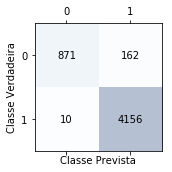

In [98]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Classe Prevista')
plt.ylabel('Classe Verdadeira')

plt.tight_layout()
plt.show()

In [99]:
accuracy1 = classif.score(Xtest_tfidf, Ytest)
accuracy1

0.9669167147528371

In [100]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [101]:
print('Precision: %.3f' % precision_score(y_true=Ytest, y_pred=y_pred_tfidf))
print('Recall: %.3f' % recall_score(y_true=Ytest, y_pred=y_pred_tfidf))
print('F1: %.3f' % f1_score(y_true=Ytest, y_pred=y_pred_tfidf))

Precision: 0.962
Recall: 0.998
F1: 0.980


In [102]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y_pred_tfidf))

             precision    recall  f1-score   support

          0       0.99      0.84      0.91      1033
          1       0.96      1.00      0.98      4166

avg / total       0.97      0.97      0.97      5199



In [103]:
y_proba = classif.predict_proba(Xtest_tfidf)

In [104]:
y_proba = y_proba[:,0]

In [105]:
y_proba

array([0.05748102, 0.02676234, 0.05750783, ..., 0.06524372, 0.04574069,
       0.17593828])

In [106]:
1 - y_pred_tfidf.mean()

0.16945566455087513

In [107]:
sum(y_proba > 0.5)/len(y_proba)

0.16945566455087516

In [108]:
Ytest

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

## Finding the most important features

Task: be able to extract qualitative info to explain which characteristics of the news texts are more relevant to the classification.

In [109]:
#Random forest

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
rf = RandomForestClassifier()

In [112]:
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [114]:
rf = rf.fit(Xtrain_tfidf, Ytrain)

In [115]:
rf.score(Xtest_tfidf, Ytest)

0.9792267743796884

In [116]:
rf.feature_importances_

array([1.00020049e-04, 2.04611361e-08, 5.87892610e-05, ...,
       1.13360274e-04, 1.07040773e-05, 3.09362119e-06])

In [117]:
import seaborn as sns

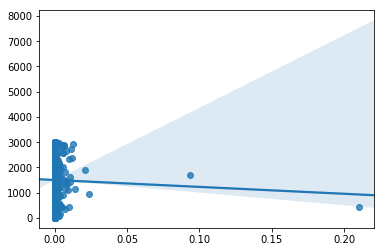

In [122]:
sns.regplot(rf.feature_importances_, np.array(list(range(len(rf.feature_importances_)))))

## Logistic Regression with cutoff $\neq$ 0.5

In [123]:
#define new cutoff 
cutoff = 0.31

y_proba = classif.predict_proba(Xtest_tfidf)
p0 = y_proba[:,0]
p1 = 1 - p0
estim = p1 > cutoff

index0 = (estim == 0).nonzero()
true0 = Ytest[index0]
estim0 = estim[index0]

FN = true0.sum()

index1 = ((1 - estim) == 0).nonzero()
true1 = Ytest[index1]
estim1 = estim[index1]

FP = len(true1) - true1.sum()

TP = true1.sum()
TN = len(true0) - true0.sum()

accuracy = (TP+TN)/(TP+TN+FN+FP)

np.array([[TP,FN],[FP,TN]])

array([[4165,    1],
       [ 260,  773]], dtype=int64)

In [124]:
accuracy

0.949798038084247

In [125]:
class Cutoff_logreg_init:
    
    def __init__(self, cutoff, model, x, Y):
    
        self.cutoff = cutoff
        self.model = model
        self.x = x
        self.Y = Y
        self.y_proba = model.predict_proba(self.x)
    
    def prob_0(self):
        '''probability of y_hat == 0'''
        return  self.y_proba[:,0]
    
    def prob_1(self):
        '''probability of y_hat == 1'''
        return 1 - self.y_proba[:,0]


In [126]:
class Cutoff_logreg_pred(Cutoff_logreg_init):
    
    def __init__(self, cutoff, model, x, Y):
        Cutoff_logreg_init.__init__(self, cutoff, model, x, Y)
        
    def estim(self):
        return (1 - self.prob_0()) > self.cutoff
    
    def pred_0(self):
        return ((self.prob_1() > self.cutoff) == 0).nonzero()
    
    def pred_1(self):
        return ((1 - (self.prob_1() > self.cutoff)) == 0).nonzero()

In [128]:
class Cutoff_logreg_values(Cutoff_logreg_pred):
    
    def __init__(self, cutoff, model, x, Y):
        Cutoff_logreg_pred.__init__(self, cutoff, model, x, Y)
    
    def true_0(self):
        return self.Y[self.pred_0()]
    
    def true_1(self):
        return self.Y[self.pred_1()]
    
    def estim_0(self):
        return self.estim()[self.pred_0()]
    
    def estim_1(self):
        return self.estim()[self.pred_1()]

In [129]:
class Cutoff_logreg_confmat_values(Cutoff_logreg_values):
    
    def __init__(self, cutoff, model, x, Y):
        Cutoff_logreg_values.__init__(self, cutoff, model, x, Y)
    
    def FN(self):
        return self.true_0().sum()
    
    def FP(self):
        return len(self.true_1()) - self.true_1().sum()
    
    def TP(self):
        return self.true_1().sum()
    
    def TN(self):
        return len(self.true_0()) - self.true_0().sum()

In [130]:
class Cutoff_logreg(Cutoff_logreg_confmat_values):
    
    def __init__(self, cutoff, model, x, Y):
        Cutoff_logreg_confmat_values.__init__(self, cutoff, model, x, Y)
    
    def confusion_matrix(self):
        return (np.array([[self.TP(), self.FN()],
                          [self.FP(), self.TN()]]))
    
    def accuracy(self):
        return (self.TP() + self.TN())/(self.TP() + self.TN() + self.FN() + self.FP())

In [131]:
Cutoff_logreg(0.31, classif, Xtest_tfidf, Ytest).confusion_matrix()

array([[4165,    1],
       [ 260,  773]], dtype=int64)

In [132]:
Cutoff_logreg(0.31, classif, Xtest_tfidf, Ytest).accuracy()

0.949798038084247

In [133]:
possible_cutoffs = np.linspace(0,0.99,1000)

In [134]:
accuracies = map(lambda x : Cutoff_logreg(x, classif, Xtest_tfidf, Ytest).accuracy(), possible_cutoffs)

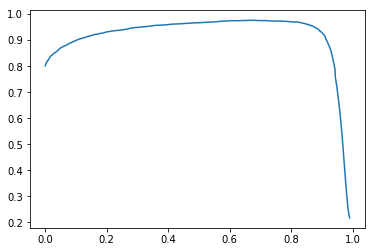

In [135]:
plt.plot(possible_cutoffs, list(accuracies))

In [136]:
accuracies = map(lambda x : Cutoff_logreg(x, classif, Xtest_tfidf, Ytest).accuracy(), possible_cutoffs)
acc = np.array((list(accuracies)))

In [137]:
best_cutoff_1, best_accuracy_1 = (possible_cutoffs[acc.argmax()], acc.max())

In [138]:
best_accuracy_1.round(4)

0.9763

In [139]:
best_cutoff_1.round(4)

0.6659

## Count Vectorizer

In [140]:
from sklearn.feature_extraction.text import CountVectorizer

In [143]:
cvt = CountVectorizer(analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), stop_words = pt_stopwords)

In [144]:
Xtrain_cvt = cvt.fit_transform(Xtrain)
Xtest_cvt = cvt.transform(Xtest)

In [145]:
classif2 = LogisticRegression()
classif2.fit(Xtrain_cvt, Ytrain)
pred2 = classif2.predict_proba(Xtest_cvt)

In [146]:
loss2 = multiclass_logloss(Ytest, pred2)
print('Log loss: {}'.format(loss2))
print('Log loss improvement: {}'.format(loss1 - loss2))

Log loss: 0.07890728925424417
Log loss improvement: 0.034422948167028705


In [147]:
y_pred_cvt = classif2.predict(Xtest_cvt)
confmat = confusion_matrix(y_true=Ytest, y_pred=y_pred_cvt)
print(confmat)

[[ 888  145]
 [   4 4162]]


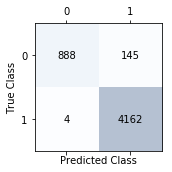

In [148]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted Class')
plt.ylabel('True Class')

plt.tight_layout()
plt.show()

In [149]:
accuracy2 = classif2.score(Xtest_cvt, Ytest)
accuracy2.round(4)

0.9713

In [150]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('Precision: %.3f' % precision_score(y_true=Ytest, y_pred=y_pred_cvt))
print('Recall: %.3f' % recall_score(y_true=Ytest, y_pred=y_pred_cvt))
print('F1: %.3f' % f1_score(y_true=Ytest, y_pred=y_pred_cvt))

Precision: 0.966
Recall: 0.999
F1: 0.982


In [151]:
from sklearn.metrics import classification_report
print(classification_report(Ytest, y_pred_cvt))

             precision    recall  f1-score   support

          0       1.00      0.86      0.92      1033
          1       0.97      1.00      0.98      4166

avg / total       0.97      0.97      0.97      5199



In [142]:
#OPTIMIZE CUTOFF PARAMETER

In [152]:
possible_cutoffs = np.linspace(0,0.99,1000)

In [153]:
accuracies = map(lambda x : Cutoff_logreg(x, classif2, Xtest_cvt, Ytest).accuracy(), possible_cutoffs)

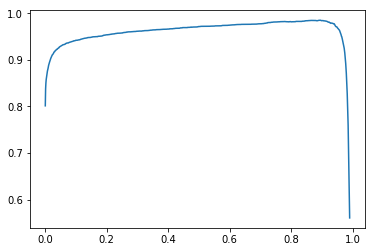

In [154]:
plt.plot(possible_cutoffs, list(accuracies))

In [155]:
accuracies = map(lambda x : Cutoff_logreg(x, classif2, Xtest_cvt, Ytest).accuracy(), possible_cutoffs)
acc = np.array((list(accuracies)))

In [156]:
best_cutoff_2, best_accuracy_2 = (possible_cutoffs[acc.argmax()], acc.max())

In [157]:
best_accuracy_2.round(4)

0.985

In [158]:
best_cutoff_2.round(4)

0.8939

## SVM

In [316]:
#first reduce dimensionality of tfidf using singular value decomposition
from sklearn import decomposition

In [317]:
svd = decomposition.TruncatedSVD(n_components = 120)
svd.fit(Xtrain_tfidf)
Xtrain_svd = svd.transform(Xtrain_tfidf)
Xtest_svd = svd.transform(Xtest_tfidf)

In [318]:
# Scale the data obtained from SVD. Renaming variable to reuse without scaling.
from sklearn import preprocessing

In [319]:
scaler = preprocessing.StandardScaler()
scaler.fit(Xtrain_svd)
Xtrain_svd_scaled = scaler.transform(Xtrain_svd)
Xtest_svd_scaled = scaler.transform(Xtest_svd)

In [320]:
#Apply SVM
from sklearn.svm import SVC

In [ ]:
classif3_linear = SVC(probability=True, kernel = 'linear')
classif3_poly = SVC(probability=True, kernel = 'poly')
classif3_rbf = SVC(probability=True, kernel = 'rbf')

classif3_list = [classif3_linear, classif3_poly, classif3_rbf]

classif3_fit = list(map(lambda model:model.fit(Xtrain_svd_scaled, Ytrain), classif3_list))

In [329]:
classif3_predict = list(map(lambda model:model.predict(Xtest_svd_scaled), classif3_list))
classif3_score = list(map(lambda model:model.score(Xtest_svd_scaled, Ytest), classif3_list))

In [326]:
loss3_linear, loss3_poly, loss3_rbf = list(map(lambda model:multiclass_logloss(Ytest, model),
                                                                          classif3_predict))
print('Log loss - Linear Kernel: {}'.format(loss3_linear))
print('Log loss - Polynomial Kernel: {}'.format(loss3_poly))
print('Log loss - RBF Kernel: {}'.format(loss3_rbf))

Log loss - Linear Kernel: 0.24216619294039587
Log loss - Polynomial Kernel: 0.2784341312640754
Log loss - RBF Kernel: 0.20385187249158207


In [327]:
print('Log loss improvement - Linear Kernel: {}'.format(loss2 - loss3_linear))
print('Log loss improvement - Polynomial Kernel:: {}'.format(loss2 - loss3_poly))
print('Log loss improvement - RBF Kernel:{}'.format(loss2 - loss3_rbf))

Log loss improvement - Linear Kernel: -0.15293625741901196
Log loss improvement - Polynomial Kernel:: -0.18920419574269148
Log loss improvement - RBF Kernel:-0.11462193697019817


## Summary table

In [300]:
class Summary:
    
    '''
    models_str = list of models to avaliate (string visualisation)
    models = list of classifier objects to pair models_str
    Ypred = Ypredicted for each model
    Ytest = True Y in test set
    Xtest_t, Xtest transformed for each model
    '''
    
    def __init__(self, models, Ypred, Ytest, Xtest_t):
        self.models = models
        self.Ypred = Ypred
        self.Ytest = Ytest
        self.Xtest_t = Xtest_t
        self.df = pd.DataFrame(columns = ['Model','Accuracy', 'Log-loss', 'Precision','Recall','F1'])
        
    def accuracies(self):
        
        acc_list = []
        
        for i in list(zip(self.models, self.Xtest_t)):
            acc_list.append(i[0].score(i[1], self.Ytest))
        
        return acc_list
    
    def logloss(self):    
        
        probas = []
        
        for j in list(zip(self.models, self.Xtest_t)):
            probas.append(j[0].predict_proba(j[1]))
            
        loss_map = map(lambda y : multiclass_logloss(Ytest, y), probas)
        return list(loss_map)
            
    def precision(self):
        
        precision_map = map(lambda y : precision_score(y_true=self.Ytest, y_pred=y), self.Ypred)
        return list(precision_map)
     
    def recall(self):
        
        recall_map = map(lambda y : recall_score(y_true=self.Ytest, y_pred=y), self.Ypred)
        return list(recall_map)
    
    def f1(self):
        
        f1_map = map(lambda y : f1_score(y_true=self.Ytest, y_pred=y), self.Ypred)
        return list(f1_map)   

In [338]:
Summary([classif, classif2], [y_pred_tfidf, y_pred_cvt], 
        Ytest, [Xtest_tfidf, Xtest_cvt]).logloss()

[0.1491692011229601, 0.0892299355213839]

In [308]:
class Summary_table(Summary):
    
    def __init__(self, models_str, models, Ypred, Ytest, Xtest_t):
        Summary.__init__(self, models, Ypred, Ytest, Xtest_t)
        self.models_str = models_str
    
    def apply(self):
        self.df['Model'] = self.models_str
        self.df['Accuracy'] = self.accuracies()
        self.df['Log-loss'] = self.logloss()
        self.df['Precision'] = self.precision()
        self.df['Recall'] = self.recall()
        self.df['F1'] = self.f1()
        
        return self.df
    

In [341]:
Summary_table(['Logistic Regression - TFIDF', 'Logistic Regression - CVT', 'SVM - Linear Kernel', 
             'SVM - Polynomial Kernel', 'SVM - RBF Kernel'],
              [classif, classif2, classif3_linear, classif3_poly, classif3_rbf],
              [y_pred_tfidf, y_pred_cvt, classif3_predict[0], classif3_predict[1], classif3_predict[2]],
              Ytest,
              [Xtest_tfidf, Xtest_cvt, Xtest_svd_scaled, Xtest_svd_scaled, Xtest_svd_scaled]).apply()

,Model,Accuracy,Log-loss,Precision,Recall,F1
0,Logistic Regression - TFIDF,0.948505,0.149169,0.966906,0.650532,0.777778
1,Logistic Regression - CVT,0.971034,0.089230,0.977778,0.809293,0.885593
2,SVM - Linear Kernel,0.914577,0.242166,0.839041,0.474347,0.606061
3,SVM - Polynomial Kernel,0.912565,0.278434,0.918681,0.404647,0.561828
4,SVM - RBF Kernel,0.928524,0.203852,0.890625,0.551791,0.681411


## Cross Validation for Logistic Regressions

In [159]:
from sklearn.model_selection import cross_val_score

In [160]:
#TFIDF
cv_scores = cross_val_score(classif, Xtest_tfidf, Ytest, cv=5)
print(cv_scores)
print("Média dos Scores CV: {}".format(np.mean(cv_scores)))

[0.93371758 0.93557692 0.93557692 0.92781521 0.92974013]
Média dos Scores CV: 0.9324853534158508


In [161]:
#CVT -> more accurate
cv_scores = cross_val_score(classif2, Xtest_cvt, Ytest, cv=5)
print(cv_scores)
print("Média dos Scores CV (Reg. Logística): {}".format(np.mean(cv_scores)))

[0.9548511  0.95961538 0.96057692 0.95380173 0.95572666]
Média dos Scores CV (Reg. Logística): 0.9569143610169188


In [162]:
from sklearn.model_selection import cross_validate

In [163]:
cv_metrics = cross_validate(classif2, Xtest_cvt, Ytest, cv=5, scoring=('precision', 'recall'))

In [164]:
print("Média das Precisions CV CVT : {}".format(np.mean(cv_metrics['test_precision'])))
print("Média das Recalls CV CVT : {}".format(np.mean(cv_metrics['test_recall'])))

Média das Precisions CV CVT : 0.9500119832125474
Média das Recalls CV CVT : 0.9987995198079233


In [165]:
cv_metrics = cross_validate(classif, Xtest_tfidf, Ytest, cv=5, scoring=('precision', 'recall'))

In [166]:
print("Média das Precisions CV TFIDF: {}".format(np.mean(cv_metrics['test_precision'])))
print("Média das Recalls CV TFIDF: {}".format(np.mean(cv_metrics['test_recall'])))

Média das Precisions CV TFIDF: 0.9226788552712113
Média das Recalls CV TFIDF: 0.9995200958081074


## Precision x Recall Tradeoff

In [167]:
y_pred_tfidf = classif.predict_proba(Xtest_tfidf)[:,1]

In [168]:
y_pred_cvt = classif2.predict_proba(Xtest_cvt)[:,1]

In [169]:
from sklearn.metrics import average_precision_score
average_precision_tfidf = average_precision_score(Ytest, y_pred_tfidf)
average_precision_cvt = average_precision_score(Ytest, y_pred_cvt)

print('Média de precision-recall tfidf: {0:0.2f}'.format(
      average_precision_tfidf))

print('Média de precision-recall cvt: {0:0.2f}'.format(
      average_precision_cvt))

Média de precision-recall tfidf: 1.00
Média de precision-recall cvt: 1.00


Text(0.5,1,'Trade-off entre Precision e Recall (TFIDF): AP=1.00')

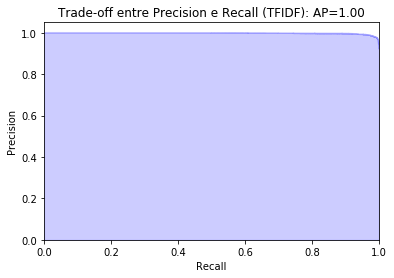

In [170]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(Ytest, y_pred_tfidf)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Trade-off entre Precision e Recall (TFIDF): AP={0:0.2f}'.format(
          average_precision_tfidf))

Text(0.5,1,'Trade-off entre Precision e Recall (CVT): AP=1.00')

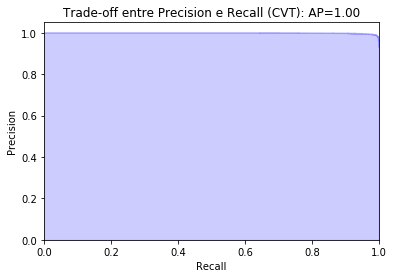

In [171]:
precision, recall, thresholds = precision_recall_curve(Ytest, y_pred_cvt)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Trade-off entre Precision e Recall (CVT): AP={0:0.2f}'.format(
          average_precision_cvt))

In [172]:
from sklearn.metrics import roc_curve, auc

In [173]:
fpr_cvt, tpr_cvt, thresholds_cvt = roc_curve(Ytest, y_pred_cvt)

In [174]:
roc_auc_cvt = auc(fpr_cvt, tpr_cvt)
roc_auc_cvt

0.9968162960284682

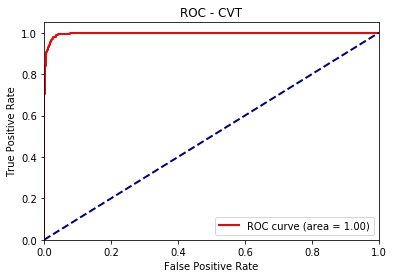

In [176]:
plt.figure()
lw = 2
plt.plot(fpr_cvt, tpr_cvt, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_cvt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - CVT')
plt.legend(loc="lower right")
plt.show()

In [177]:
fpr_tfidf, tpr_tfidf, thresholds_tfidf = roc_curve(Ytest, y_pred_tfidf)

In [178]:
roc_auc_tfidf = auc(fpr_tfidf, tpr_tfidf)

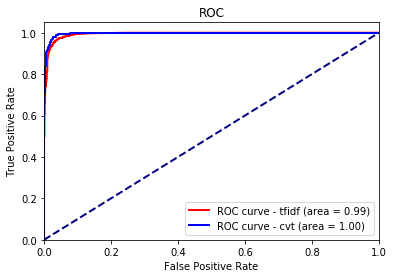

In [179]:
plt.figure()
lw = 2
plt.plot(fpr_tfidf, tpr_tfidf, color='red',
         lw=lw, label='ROC curve - tfidf (area = %0.2f)' % roc_auc_tfidf)
plt.plot(fpr_cvt, tpr_cvt, color='blue',
         lw=lw, label='ROC curve - cvt (area = %0.2f)' % roc_auc_cvt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

## Levenshtein

In [196]:
import Levenshtein

In [197]:
Levenshtein.distance('sstring1012', 'string2')

4

In [291]:
def levenshtein_matrix(list_1, list_2):
    
    df = pd.DataFrame(list_1)
    distance_df = pd.DataFrame()
    
    j=0
    
    for el in list_2:
        distance_df[str(j)] = df.iloc[:,0].apply(lambda x:Levenshtein.distance(str(el),str(x)))
        j+=1
        
    return(distance_df)

In [287]:
a = np.array(['a','ab','ga'])
b = np.array(['ac','aab'])

In [288]:
levenshtein_matrix(a,b)

,0,1
0,1,2
1,1,1
2,2,2


In [289]:
levenshtein_matrix(['a','dsd','wkwew'],['a','wkre'])

,0,1
0,0,4
1,3,4
2,5,2


In [247]:
#check if boatos is multicolinear with newsatual

In [352]:
LM = levenshtein_matrix(np.array(boatos['title']), np.array(newsatual['title']))

In [293]:
LM.shape

(2715, 2451)

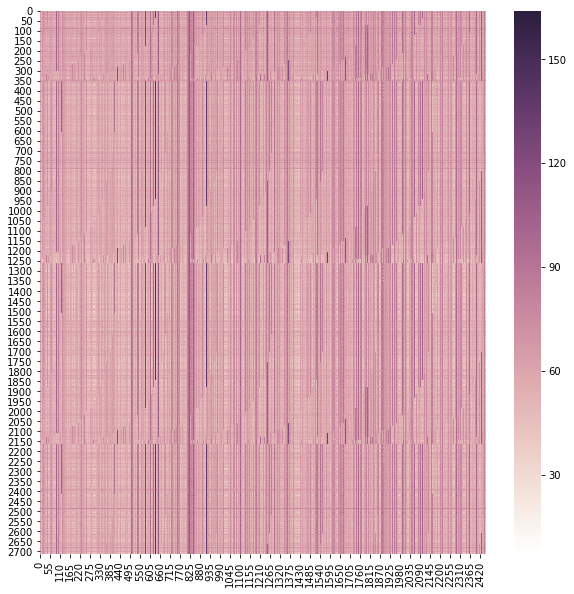

In [357]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(LM, ax=ax, cmap=cmap)

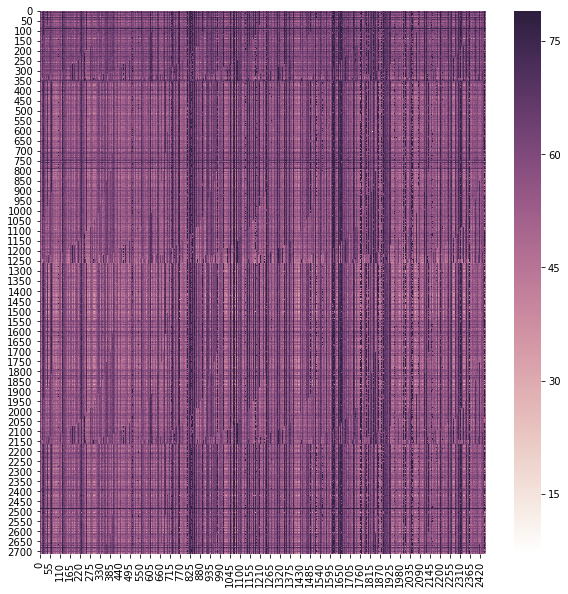

In [356]:
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.heatmap(LM[LM <80], ax=ax, cmap=cmap)

In [323]:
LM.min().min()

7

In [324]:
LM.max().max()

164

In [322]:
LM.values.flatten().mean()

62.96533861099277

In [321]:
LM.values.flatten().std()

13.60305826065938

In [347]:
boatos['title'].apply(lambda x:len(x)).sum() + newsatual['title'].apply(lambda x:len(x)).sum()

361504

In [349]:
len(boatos['title']) + len(newsatual['title'])

5166

In [350]:
361504/5166

69.9775454897406

In [ ]:
#TAMANHO MEDIO DO TEXTO = 70
#TAMANHO MEDIO DAS DISTANCIAS DE LEVENSHTEIN = 62 +- 13.6
#POUQUISSIMO INDICIO DE MULTICOLINEARIDADE

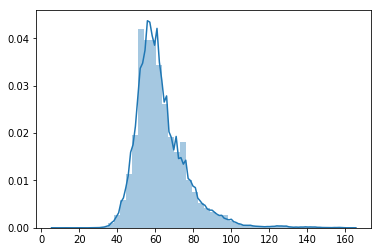

In [361]:
sns.distplot(LM.values.flatten())